## Tugas Praktikum

### 1. Tugas K-Means

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/drive/MyDrive/Datasets/Mall_Customers.csv")

1.   Gunakan data 'Mall_Customers.csv'

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


2.   Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [ ]:
# Memilih fitur 'Annual Income' dan 'Spending Score'
X_mall = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\nFitur yang akan digunakan untuk clustering:")
X_mall.head()


Fitur yang akan digunakan untuk clustering:


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


3.   Buatlah model K-Means dengan mempertimbangkan jumlah kk yang terbaik.

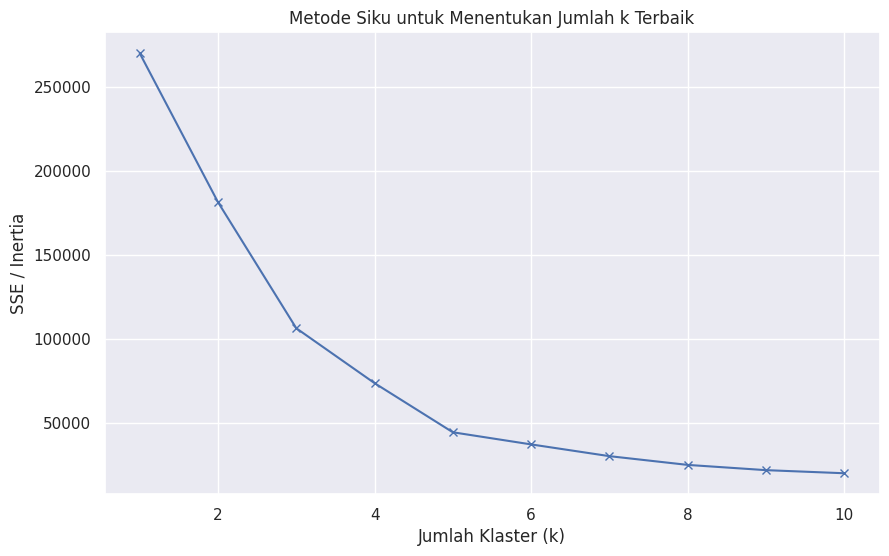

In [ ]:
# List untuk menyimpan nilai SSE (Sum of Squared Errors) atau Inertia
sse = []

# Kita akan menguji k dari 1 sampai 10
K = range(1, 11)

for k in K:
    # Membuat model KMeans untuk setiap nilai k
    kmeanModel = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeanModel.fit(X_mall)
    sse.append(kmeanModel.inertia_)

# Membuat plot Metode Siku
plt.figure(figsize=(10, 6))
plt.plot(K, sse, "bx-")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("SSE / Inertia")
plt.title("Metode Siku untuk Menentukan Jumlah k Terbaik")
plt.grid(True)
plt.show()

### 2. Tugas DBSCAN

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

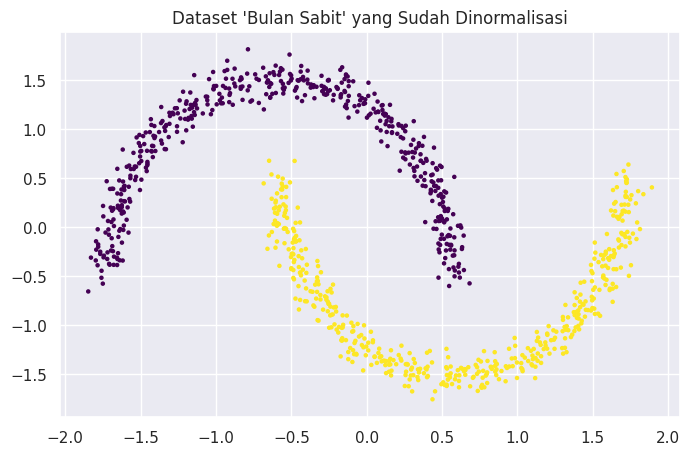

In [ ]:
# 1. Membuat dataset
X_moons, y_moons_true = make_moons(n_samples=1000, noise=0.05)

# 2. Normalisasi data
X_moons_scaled = StandardScaler().fit_transform(X_moons)

# Visualisasi data awal
plt.figure(figsize=(8, 5))
plt.scatter(X_moons_scaled[:, 0], X_moons_scaled[:, 1], c=y_moons_true, cmap='viridis', s=5)
plt.title("Dataset 'Bulan Sabit' yang Sudah Dinormalisasi")
plt.show()

2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import *

# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.2, min_samples=5).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")


Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [ ]:
# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

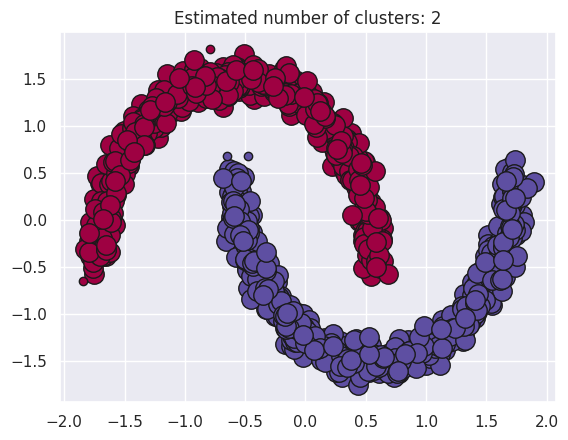

In [ ]:
unique_labels = set(labels_baseline)
core_samples_mask = np.zeros_like(labels_baseline, dtype=bool)
core_samples_mask[db_baseline.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_baseline == k

    xy = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_base}")
plt.show()

5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import *

# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.05, min_samples=3).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)


print("\n--- Hasil Eksperimen eps = 0.05, min_samples = 3 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")

Estimasi Jumlah Klaster: 78
Estimasi Jumlah Noise: 188

--- METRIK EVALUASI ---
Homogeneity: 0.812
Completeness: 0.150
V-measure: 0.253
Adjusted Rand Index: 0.029
Adjusted Mutual Information: 0.238
Silhouette Coefficient: 0.073


In [ ]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.1, min_samples=10).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.1, min_samples = 10 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.1, min_samples = 10 ---
Estimasi Jumlah Klaster: 7
Estimasi Jumlah Noise: 58

--- METRIK EVALUASI ---
Homogeneity: 0.943
Completeness: 0.368
V-measure: 0.529
Adjusted Rand Index: 0.402
Adjusted Mutual Information: 0.528
Silhouette Coefficient: 0.295


In [ ]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.3, min_samples=20).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.3, min_samples = 20 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.3, min_samples = 20 ---
Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0

--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


In [ ]:
# Menjalankan DBSCAN dengan parameter baseline
db_baseline = DBSCAN(eps=0.5, min_samples=20).fit(X_moons_scaled)
labels_baseline = db_baseline.labels_

# Menghitung jumlah klaster dan noise
n_clusters_base = len(set(labels_baseline)) - (1 if -1 in labels_baseline else 0)
n_noise_base = list(labels_baseline).count(-1)

print("\n--- Hasil Eksperimen eps = 0.5, min_samples = 20 ---")
print(f"Estimasi Jumlah Klaster: {n_clusters_base}")
print(f"Estimasi Jumlah Noise: {n_noise_base}")

# Evaluasi kualitas klaster
print("\n--- METRIK EVALUASI ---")
print(f"Homogeneity: {homogeneity_score(y_moons_true, labels_baseline):.3f}")
print(f"Completeness: {completeness_score(y_moons_true, labels_baseline):.3f}")
print(f"V-measure: {v_measure_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_moons_true, labels_baseline):.3f}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_score(y_moons_true, labels_baseline):.3f}")
print(f"Silhouette Coefficient: {silhouette_score(X_moons_scaled, labels_baseline):.3f}")


--- Hasil Eksperimen eps = 0.5, min_samples = 20 ---
Estimasi Jumlah Klaster: 2
Estimasi Jumlah Noise: 0

--- METRIK EVALUASI ---
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
